In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import csv
from requests import get
from urllib.parse import urlparse
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import libpysal as ps
import json
import matplotlib.cm as cm
import scipy as sp
import scipy.stats as sps
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression


## main data

In [2]:
url = 'https://github.com/OwO26/0007_Ass3/blob/main/msoa.csv?raw=true'
m = pd.read_csv(url, low_memory=False)
print(f"Data frame is {m.shape[0]:,} x {m.shape[1]}")

path = os.path.join('data','raw')
fn   = url.split('/')[-1]
print(f"Writing to: {fn}")

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
m.to_csv(os.path.join(path,fn), index=False)
print("Done.")

cols = ['Middle Super Output Area', 
        "Lone Parents (2011 Census);Lone parent not in employment %;",
        "Economic Activity (2011 Census);Temps Rate;",
        "Country of Birth (2011);Not United Kingdom (%);",
       "Qualifications (2011 Census);No qualifications;",
        "Qualifications (2011 Census);Highest level of qualification: Level 1 qualifications;",
        "Qualifications (2011 Census);Highest level of qualification: Level 2 qualifications;",
        "Qualifications (2011 Census);Highest level of qualification: Apprenticeship;",
        "Qualifications (2011 Census);Highest level of qualification: Level 3 qualifications;",
        "Qualifications (2011 Census);Highest level of qualification: Level 4 qualifications and above;",
        "Qualifications (2011 Census);Highest level of qualification: Other qualifications;",
        "Qualifications (2011 Census);Schoolchildren and full-time students: Age 18 and over;",
       "Health (2011 Census);Very bad health (%);",
       "Health (2011 Census);Bad health (%);"]

del(m)
m = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols, nrows=10000)
print(f"Data frame is {m.shape[0]:,} x {m.shape[1]}")

Data frame is 984 x 207
Writing to: msoa.csv?raw=true
Done.
Data frame is 984 x 14


In [3]:
m

,Middle Super Output Area,Country of Birth (2011);Not United Kingdom (%);,Qualifications (2011 Census);No qualifications;,Qualifications (2011 Census);Highest level of qualification: Level 1 qualifications;,Qualifications (2011 Census);Highest level of qualification: Level 2 qualifications;,Qualifications (2011 Census);Highest level of qualification: Apprenticeship;,Qualifications (2011 Census);Highest level of qualification: Level 3 qualifications;,Qualifications (2011 Census);Highest level of qualification: Level 4 qualifications and above;,Qualifications (2011 Census);Highest level of qualification: Other qualifications;,Qualifications (2011 Census);Schoolchildren and full-time students: Age 18 and over;,Economic Activity (2011 Census);Temps Rate;,Lone Parents (2011 Census);Lone parent not in employment %;,Health (2011 Census);Bad health (%);,Health (2011 Census);Very bad health (%);
0,E02000001,36.7,454,291,445,47,484,4618,416,422,3.8,24.2,2.6,0.8
1,E02000002,23.9,1623,789,706,118,479,914,395,272,11.8,56.0,5.7,1.6
2,E02000003,28.4,1778,1210,1236,169,847,1829,729,442,9.1,48.8,4.0,1.1
3,E02000004,14.4,1502,800,825,163,539,891,266,215,9.3,42.2,4.9,1.2
4,E02000005,25.0,1839,1026,1038,160,653,1119,527,333,9.7,52.3,4.8,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,E02000980,44.0,1035,581,614,80,601,3716,780,485,7.1,57.3,4.7,1.8
980,E02000981,42.9,611,399,529,66,696,5028,749,617,5.2,46.5,3.0,1.2
981,E02000982,45.5,1069,574,671,83,624,2960,799,479,7.2,61.3,5.3,1.7
982,E02000983,41.3,1214,567,606,71,609,3341,769,527,6.2,55.6,5.0,1.9


In [4]:
m.columns=["msoa","notuk","Qno","Q1","Q2","QAPP","Q3","Q4","QO","Q18","temp","lone","verybad","badheal"]
m

,msoa,notuk,Qno,Q1,Q2,QAPP,Q3,Q4,QO,Q18,temp,lone,verybad,badheal
0,E02000001,36.7,454,291,445,47,484,4618,416,422,3.8,24.2,2.6,0.8
1,E02000002,23.9,1623,789,706,118,479,914,395,272,11.8,56.0,5.7,1.6
2,E02000003,28.4,1778,1210,1236,169,847,1829,729,442,9.1,48.8,4.0,1.1
3,E02000004,14.4,1502,800,825,163,539,891,266,215,9.3,42.2,4.9,1.2
4,E02000005,25.0,1839,1026,1038,160,653,1119,527,333,9.7,52.3,4.8,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,E02000980,44.0,1035,581,614,80,601,3716,780,485,7.1,57.3,4.7,1.8
980,E02000981,42.9,611,399,529,66,696,5028,749,617,5.2,46.5,3.0,1.2
981,E02000982,45.5,1069,574,671,83,624,2960,799,479,7.2,61.3,5.3,1.7
982,E02000983,41.3,1214,567,606,71,609,3341,769,527,6.2,55.6,5.0,1.9


In [5]:
m=m.dropna()

In [6]:
m["health"]=m["verybad"]+m['badheal']
m["Q"]=m["Qno"]+m["Q1"]+m["Q2"]+m["QAPP"]+m["Q3"]+m["Q4"]+m["QO"]+m["Q18"]
m["Qno_rate"]=m["Qno"]/m["Q"]*100
m

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,msoa,notuk,Qno,Q1,Q2,QAPP,Q3,Q4,QO,Q18,temp,lone,verybad,badheal,health,Q,Qno_rate
0,E02000001,36.7,454,291,445,47,484,4618,416,422,3.8,24.2,2.6,0.8,3.4,7177,6.325763
1,E02000002,23.9,1623,789,706,118,479,914,395,272,11.8,56.0,5.7,1.6,7.3,5296,30.645770
2,E02000003,28.4,1778,1210,1236,169,847,1829,729,442,9.1,48.8,4.0,1.1,5.1,8240,21.577670
3,E02000004,14.4,1502,800,825,163,539,891,266,215,9.3,42.2,4.9,1.2,6.1,5201,28.879062
4,E02000005,25.0,1839,1026,1038,160,653,1119,527,333,9.7,52.3,4.8,1.4,6.2,6695,27.468260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,E02000979,46.4,765,439,596,68,656,3726,803,580,6.5,46.3,3.7,1.3,5.0,7633,10.022272
979,E02000980,44.0,1035,581,614,80,601,3716,780,485,7.1,57.3,4.7,1.8,6.5,7892,13.114546
980,E02000981,42.9,611,399,529,66,696,5028,749,617,5.2,46.5,3.0,1.2,4.2,8695,7.027027
981,E02000982,45.5,1069,574,671,83,624,2960,799,479,7.2,61.3,5.3,1.7,7.0,7259,14.726546


In [7]:
m.drop(columns=['verybad','badheal',"Qno","Q1","Q2","QAPP","Q3","Q4","QO","Q18","Q"], inplace=True)
m.msoa.unique()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['E02000001', 'E02000002', 'E02000003', 'E02000004', 'E02000005',
       'E02000007', 'E02000008', 'E02000009', 'E02000010', 'E02000011',
       'E02000012', 'E02000013', 'E02000014', 'E02000015', 'E02000016',
       'E02000017', 'E02000018', 'E02000019', 'E02000020', 'E02000021',
       'E02000022', 'E02000023', 'E02006799', 'E02000024', 'E02000025',
       'E02000026', 'E02000027', 'E02000028', 'E02000029', 'E02000030',
       'E02000031', 'E02000032', 'E02000033', 'E02000034', 'E02000035',
       'E02000036', 'E02000037', 'E02000038', 'E02000039', 'E02000040',
       'E02000041', 'E02000042', 'E02000043', 'E02000044', 'E02000045',
       'E02000046', 'E02000047', 'E02000048', 'E02000049', 'E02000050',
       'E02000051', 'E02000052', 'E02000053', 'E02000054', 'E02000055',
       'E02000056', 'E02000057', 'E02000058', 'E02000059', 'E02000060',
       'E02000061', 'E02000062', 'E02000063', 'E02000064', 'E02000065',
       'E02000066', 'E02000067', 'E02000068', 'E02000069', 'E020

In [8]:
m

,msoa,notuk,temp,lone,health,Qno_rate
0,E02000001,36.7,3.8,24.2,3.4,6.325763
1,E02000002,23.9,11.8,56.0,7.3,30.645770
2,E02000003,28.4,9.1,48.8,5.1,21.577670
3,E02000004,14.4,9.3,42.2,6.1,28.879062
4,E02000005,25.0,9.7,52.3,6.2,27.468260
...,...,...,...,...,...,...
978,E02000979,46.4,6.5,46.3,5.0,10.022272
979,E02000980,44.0,7.1,57.3,6.5,13.114546
980,E02000981,42.9,5.2,46.5,4.2,7.027027
981,E02000982,45.5,7.2,61.3,7.0,14.726546


## Female data

In [9]:
url2 = 'https://github.com/OwO26/0007_Ass3/blob/main/2002_2012_genderwork.csv?raw=true'
sex = pd.read_csv(url2, low_memory=False)
print(f"Data frame is {sex.shape[0]:,} x {sex.shape[1]}")

path = os.path.join('data','raw')
fn   = url2.split('/')[-1]
print(f"Writing to: {fn}")

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
sex.to_csv(os.path.join(path,fn), index=False)
print("Done.")

cols = ["Middle Super Output Area","Year","Total","F"]

del(sex)
sex = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols, nrows=10000)
print(f"Data frame is {sex.shape[0]:,} x {sex.shape[1]}")



Data frame is 12,779 x 8
Writing to: 2002_2012_genderwork.csv?raw=true
Done.
Data frame is 10,000 x 4


In [10]:
sex2=sex[sex.Year==2011]
sex3=sex2.rename({'Middle Super Output Area':'msoa','Year':'Year',"Total":"Total","F":"F"},axis='columns')
sex3

,msoa,Year,Total,F
8847,E02000001,2011,5810,2471
8848,E02000002,2011,3992,2168
8849,E02000003,2011,6618,3396
8850,E02000004,2011,4044,2053
8851,E02000005,2011,5506,2875
...,...,...,...,...
9825,E02000979,2011,6180,2785
9826,E02000980,2011,6329,3091
9827,E02000981,2011,7276,3543
9828,E02000982,2011,5738,2909


In [11]:
sex3.dropna()
sex3.drop(columns=['Year'], inplace=True)
sex3.msoa.unique()

array(['E02000001', 'E02000002', 'E02000003', 'E02000004', 'E02000005',
       'E02000007', 'E02000008', 'E02000009', 'E02000010', 'E02000011',
       'E02000012', 'E02000013', 'E02000014', 'E02000015', 'E02000016',
       'E02000017', 'E02000018', 'E02000019', 'E02000020', 'E02000021',
       'E02000022', 'E02000023', 'E02006799', 'E02000024', 'E02000025',
       'E02000026', 'E02000027', 'E02000028', 'E02000029', 'E02000030',
       'E02000031', 'E02000032', 'E02000033', 'E02000034', 'E02000035',
       'E02000036', 'E02000037', 'E02000038', 'E02000039', 'E02000040',
       'E02000041', 'E02000042', 'E02000043', 'E02000044', 'E02000045',
       'E02000046', 'E02000047', 'E02000048', 'E02000049', 'E02000050',
       'E02000051', 'E02000052', 'E02000053', 'E02000054', 'E02000055',
       'E02000056', 'E02000057', 'E02000058', 'E02000059', 'E02000060',
       'E02000061', 'E02000062', 'E02000063', 'E02000064', 'E02000065',
       'E02000066', 'E02000067', 'E02000068', 'E02000069', 'E020

In [12]:
sex3["f_rate"]=sex3["F"]/sex3["Total"]
sex3

,msoa,Total,F,f_rate
8847,E02000001,5810,2471,0.425301
8848,E02000002,3992,2168,0.543086
8849,E02000003,6618,3396,0.513146
8850,E02000004,4044,2053,0.507666
8851,E02000005,5506,2875,0.522158
...,...,...,...,...
9825,E02000979,6180,2785,0.450647
9826,E02000980,6329,3091,0.488387
9827,E02000981,7276,3543,0.486943
9828,E02000982,5738,2909,0.506971


In [13]:
sex3.dropna()
sex3.drop(columns=['Total','F'], inplace=True)
sex3.msoa.unique()

array(['E02000001', 'E02000002', 'E02000003', 'E02000004', 'E02000005',
       'E02000007', 'E02000008', 'E02000009', 'E02000010', 'E02000011',
       'E02000012', 'E02000013', 'E02000014', 'E02000015', 'E02000016',
       'E02000017', 'E02000018', 'E02000019', 'E02000020', 'E02000021',
       'E02000022', 'E02000023', 'E02006799', 'E02000024', 'E02000025',
       'E02000026', 'E02000027', 'E02000028', 'E02000029', 'E02000030',
       'E02000031', 'E02000032', 'E02000033', 'E02000034', 'E02000035',
       'E02000036', 'E02000037', 'E02000038', 'E02000039', 'E02000040',
       'E02000041', 'E02000042', 'E02000043', 'E02000044', 'E02000045',
       'E02000046', 'E02000047', 'E02000048', 'E02000049', 'E02000050',
       'E02000051', 'E02000052', 'E02000053', 'E02000054', 'E02000055',
       'E02000056', 'E02000057', 'E02000058', 'E02000059', 'E02000060',
       'E02000061', 'E02000062', 'E02000063', 'E02000064', 'E02000065',
       'E02000066', 'E02000067', 'E02000068', 'E02000069', 'E020

In [14]:
sex3["f_rate1"]=sex3["f_rate"]*100
sex3.drop(columns=['f_rate'], inplace=True)
sex3

,msoa,f_rate1
8847,E02000001,42.530120
8848,E02000002,54.308617
8849,E02000003,51.314597
8850,E02000004,50.766568
8851,E02000005,52.215765
...,...,...
9825,E02000979,45.064725
9826,E02000980,48.838679
9827,E02000981,48.694338
9828,E02000982,50.697107


## Merge

In [15]:
mix=m.merge(sex3,on="msoa")
mix

,msoa,notuk,temp,lone,health,Qno_rate,f_rate1
0,E02000001,36.7,3.8,24.2,3.4,6.325763,42.530120
1,E02000002,23.9,11.8,56.0,7.3,30.645770,54.308617
2,E02000003,28.4,9.1,48.8,5.1,21.577670,51.314597
3,E02000004,14.4,9.3,42.2,6.1,28.879062,50.766568
4,E02000005,25.0,9.7,52.3,6.2,27.468260,52.215765
...,...,...,...,...,...,...,...
978,E02000979,46.4,6.5,46.3,5.0,10.022272,45.064725
979,E02000980,44.0,7.1,57.3,6.5,13.114546,48.838679
980,E02000981,42.9,5.2,46.5,4.2,7.027027,48.694338
981,E02000982,45.5,7.2,61.3,7.0,14.726546,50.697107


# Analysis

## Check outlier and whether the distribution is normal

In [16]:
print(mix.describe())


            notuk        temp        lone      health    Qno_rate     f_rate1
count  983.000000  983.000000  983.000000  983.000000  983.000000  983.000000
mean    36.208037    7.379552   45.678332    4.944964   16.495334   50.329271
std     13.833997    2.839261    9.263625    1.390341    5.982855    2.196261
min      4.400000    2.500000   19.400000    1.700000    3.316567   40.122366
25%     26.950000    5.100000   39.800000    4.000000   12.202909   49.324399
50%     37.200000    7.100000   46.500000    4.900000   16.146759   50.597520
75%     46.400000    9.300000   51.900000    5.750000   20.278369   51.737111
max     69.200000   17.400000   78.100000   10.900000   35.897436   57.427757


<AxesSubplot:>

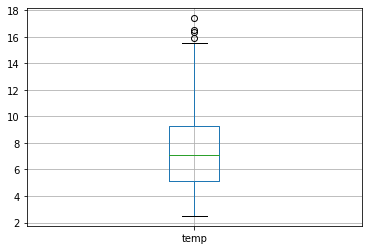

In [17]:
mix.boxplot(["temp"])

<AxesSubplot:>

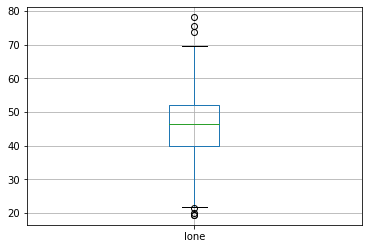

In [18]:
mix.boxplot(["lone"])

<AxesSubplot:>

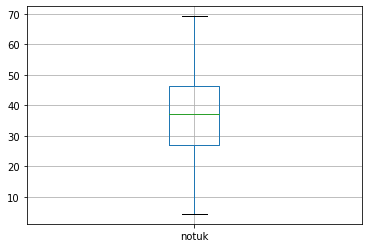

In [19]:
mix.boxplot(["notuk"])

<AxesSubplot:>

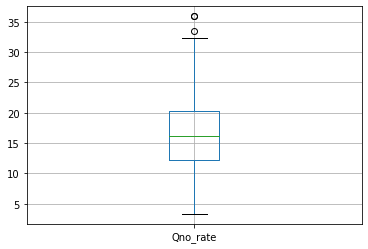

In [20]:
mix.boxplot(["Qno_rate"])

<AxesSubplot:>

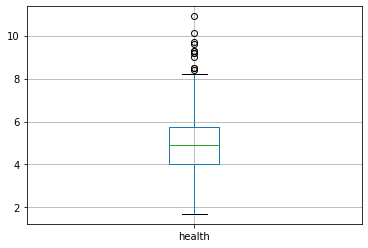

In [21]:
mix.boxplot(["health"])

<AxesSubplot:>

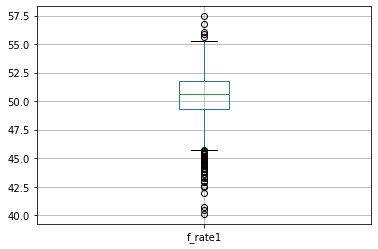

In [22]:
mix.boxplot(["f_rate1"])

## VIF

In [23]:
pd.set_option('display.max_rows', 80)
pd.options.display.float_format = '{:40,.4f}'.format
plt.style.use('ggplot')
%matplotlib inline

In [24]:
mix_num=pd.get_dummies(mix)

In [25]:
mix_five=mix.loc[:,["temp","lone","notuk","Qno_rate","health","f_rate1"]]

In [26]:
mix_five2 = sm.formula.ols("temp ~ lone+notuk+Qno_rate+health+f_rate1", mix_five).fit()
mix_five2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     599.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.51e-294
Time:                        00:21:14   Log-Likelihood:                -1730.8
No. Observations:                 983   AIC:                             3474.
Df Residuals:                     977   BIC:                             3503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0861      1.249     -6.473      0.000     -10.538      -5.634
lone           0.0469      0.007      6.760      0.000       0.033       0.061
notuk          0.0752      0.005     16.382      0.000       0.066       0.084
Qno_rate       0.2049      0.012     17.136      0.000       0.181       0.228
health         0.6338      0.058     10.988      0.000       0.521       0.747
f_rate1        0.0811      0.024      3.393      0.001       0.034       0.128
==============================================================================
Omnibus:                       49.817   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.352
Skew:                           0.515   Prob(JB):                     1.29e-13
Kurtosis:                       3.622   Cond. No.                     2.21e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        vif_df = vif_df.drop('const')
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [28]:
mix_new = drop_column_using_vif_(mix_five.drop('temp', axis=1))
print(mix_new)

                                        lone  \
0                                    24.2000   
1                                    56.0000   
2                                    48.8000   
3                                    42.2000   
4                                    52.3000   
..                                       ...   
978                                  46.3000   
979                                  57.3000   
980                                  46.5000   
981                                  61.3000   
982                                  55.6000   

                                       notuk  \
0                                    36.7000   
1                                    23.9000   
2                                    28.4000   
3                                    14.4000   
4                                    25.0000   
..                                       ...   
978                                  46.4000   
979                                  44

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## multiple linear regression

In [29]:

multi_regression_model_1 = smf.ols(formula='temp ~ lone+notuk+Qno_rate+health+f_rate1',data=mix).fit()

print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   temp   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     599.0
Date:                Mon, 27 Dec 2021   Prob (F-statistic):          1.51e-294
Time:                        00:21:14   Log-Likelihood:                -1730.8
No. Observations:                 983   AIC:                             3474.
Df Residuals:                     977   BIC:                             3503.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.0861      1.249     -6.473      0.0

## Expression

In [30]:
beta_0, beta_lone, beta_notuk,beta_Qno,beta_healthy,beta_f_rate1= multi_regression_model_1.params
rsq                    = multi_regression_model_1.rsquared
arsq=multi_regression_model_1.rsquared_adj
pval_0, pval_1, pval_3,pval_4,pval_5,pval_6= multi_regression_model_1.pvalues

print("temp =", round(beta_lone,3), "lone +", round(beta_notuk,3), "notuk +",round(beta_Qno,3), "Qno +",round(beta_healthy,3), "health +", round(beta_f_rate1,3), "female +",round(beta_0,3))
print("R^2     = ", rsq)
print("Adj.R^2 =", arsq)
print("p-value_lone = ", round(pval_1,3))
print("p-value_notuk = ", round(pval_3,3))
print("p-value_Qno = ", round(pval_4,3))
print("p-value_health = ", round(pval_5,3))
print("p-value_f_rate = ", round(pval_5,3))

temp = 0.047 lone + 0.075 notuk + 0.205 Qno + 0.634 health + 0.081 female + -8.086
R^2     =  0.7540249497395382
Adj.R^2 = 0.752766121437284
p-value_lone =  0.0
p-value_notuk =  0.0
p-value_Qno =  0.0
p-value_health =  0.0
p-value_f_rate =  0.0


## Visualisation

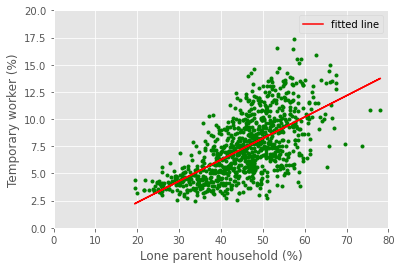

y = 0.196 x + -1.591
Rsq =  0.4105876098058682
p-value =  9.756803615191014e-115


In [31]:
X = mix['lone']
Y = mix['temp']

a = plt.plot(X,Y,'g.')
plt.xlim(0,80)
plt.ylim(0,20)
plt.xlabel('Lone parent household (%)')
plt.ylabel('Temporary worker (%)')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line')
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

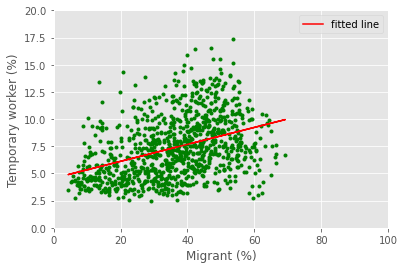

y = 0.078 x + 4.555
Rsq =  0.14450206979030578
p-value =  3.7746945735538075e-35


In [32]:
X = mix['notuk']
Y = mix['temp']

a = plt.plot(X,Y,'g.')
plt.xlim(0,100)
plt.ylim(0,20)
plt.xlabel('Migrant (%)')
plt.ylabel('Temporary worker (%)')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line')
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

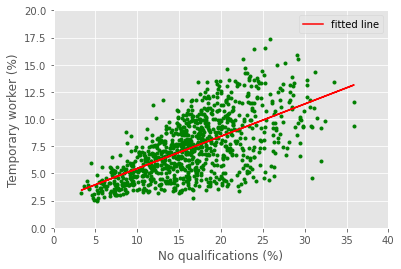

y = 0.297 x + 2.481
Rsq =  0.39152605218319503
p-value =  6.020407981184355e-108


In [33]:
X = mix['Qno_rate']
Y = mix['temp']

a = plt.plot(X,Y,'g.')
plt.xlim(0,40)
plt.ylim(0,20)
plt.xlabel('No qualifications (%)')
plt.ylabel('Temporary worker (%)')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line')
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

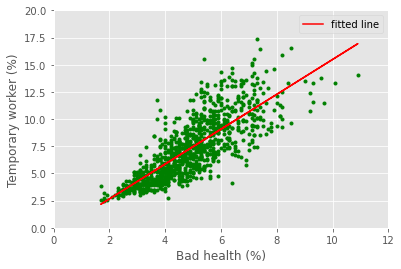

y = 1.603 x + -0.548
Rsq =  0.6163275357661213
p-value =  2.776541895929224e-206


In [34]:
X = mix['health']
Y = mix['temp']

a = plt.plot(X,Y,'g.')
plt.xlim(0,12)
plt.ylim(0,20)
plt.xlabel('Bad health (%)')
plt.ylabel('Temporary worker (%)')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line')
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

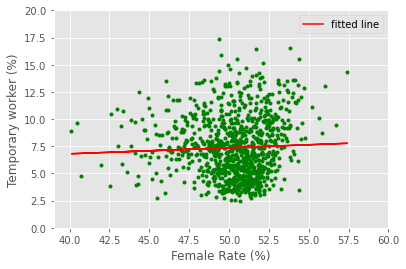

y = 0.055 x + 4.59
Rsq =  0.0018387401412796166
p-value =  0.17916404000873976


In [35]:
X = mix['f_rate1']
Y = mix['temp']

a = plt.plot(X,Y,'g.')
plt.xlim(39,60)
plt.ylim(0,20)
plt.xlabel('Female Rate (%)')
plt.ylabel('Temporary worker (%)')

slope, intercept, r_value, p_value, std_err = sps.linregress(X, Y) 

b = plt.plot(X, X*slope + intercept, 'r', label='fitted line')
plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

## Residual

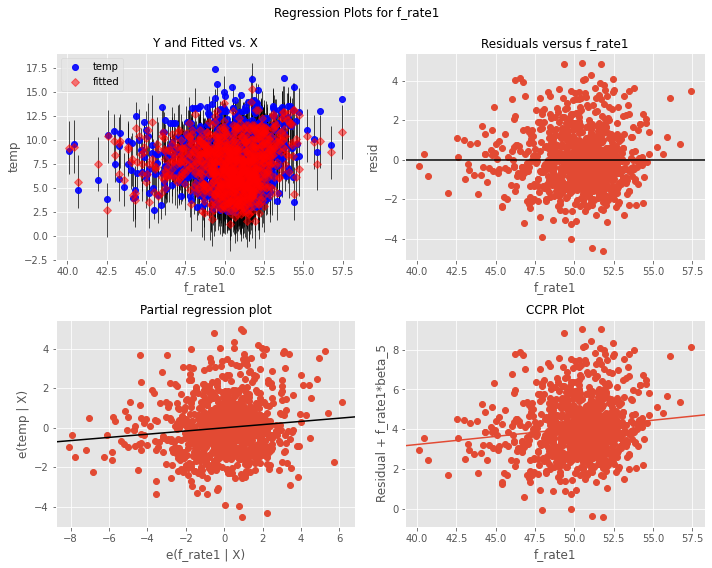

In [36]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_regress_exog(multi_regression_model_1, 'f_rate1', fig=fig)